# Assignment 1: Splines

## Introduction

Splines provide a technique to interpolate data points. They allow to define functions piecewise so that the data points lie on the function graph 
and certain conditions are fulfilled. The goals of this assignment can be summarized as follows:

#### Goals

* Learn how to implement two simple types of spline functions.
* Study the impact of imposing continuity and differentiability constraints on the resulting function.
* Learn some numpy / matplotlib wrangling.

#### Instructions

In a first step (problem 1. and 2.), the goal is to compute two splines defined between three given data points and to study two types of continuity and smoothness conditions which lead to two types of splines. The data points are given by $(x_1,y_1),(x_2,y_2),(x_3,y_3)$ where we assume that  $x_1<x_2<x_3$. 

In problem 3., you generalize the work of problem 2. to an arbitrary number of data points.

All the implementation work must be done in this notebook and you must not just use an existing library implementation of the splines. 
The data ($grid$) are provided in form of a 2d numpy array of shape $(2,N)$ where $N$ is the number of data points to be interpolated.
The piece-wise spline function should allow to be evaluated by passing an array of values ($x0$). 

I have added a few TEST cells that you can use to test your code. If these test cells execute without exception or produce a nice looking graph (graph of te functions passing through the data points (red crosses), then your implementation has better chances to be correct.

#### Submission

Copy the notebook to your local system and complete the blank parts. 
Name it with as 

$\qquad({\rm name of team})\_HS20\_assignment1.ipynb$ 

and submit it by email to [Martin Melchior](mailto:martin.melchior@fhnw.ch).

#### Imports 
For plotting, use matplotlib.
The following imports should hence be sufficient.

In [1]:
%matplotlib inline
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

## Problem 1

Implement the linear spline function $f$ such that 
* $f(x_k)=y_k$ for $k=0,1,2$.
* $f$ is a linear function between the data points $x_{k}<x<x_{k+1}$ for $k=0,1$
* $f(x)=y_0$ for $x\le x_0$ and $f(x)=y_2$ for $x\ge x_2$ 
* $f$ is continuous.

Proceed as follows:

### (a) Derive formulas

We set

$f_1 (x) = c_1 + b_1 (x-x_0)$<br>
$f_2 (x) = c_2 + b_2 (x-x_1)$

Define:
$f(x)=\left\{\begin{array}{ll}
y_0 & (x < x_0)\\
f_1(x) & (x\in [x_0,x_1[)\\
f_2(x) & (x\in [x_1,x_2[)\\
y_2 & (x\ge x_2)\end{array}\right.$

Express the coefficients $a_1,b_1,a_2,b_2$ based on the coordinates of the datapoints under the condition that the resulting function is continuous.

#### Your Solution HERE


For $f1$<br>

$f_1 (1) = a_1 + b_1 (1 - 1) = 1 $<br>
$f_2 (4) = a_1 + b_1 (4 - 1) = 6 $<br>

We now have two equations for two unknowns and can solve for $a_1 and b_1$:

$a_1 = 1 $<br>
$b_1 = 5/3 $<br>

<br>

For $f2$ <br>

$f_1 (4) = a_1 + b_1 * (4 - 4) = 6$<br>
$f_2 (6) = a_1 + b_1 * (6 - 4) = 4 $<br>

We now have two equations for two unknowns and can solve for $a_2 and b_2$:

$a_2 = 6 $<br>
$b_2 = -1 $<br>


### (b) Implement the function

Implement the function with signature as given below ($linear\_spline\_3$):

In [266]:


def linear_spline_3(x, grid):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,3)
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    return np.array([splinePointAt(xi, grid) for xi in x])
    
    

def splinePointAt(x, grid):
    
    # Find index of the relevant grid segment
    i = 0
    while i < len(grid[0]) and grid[0,i] < x:
        i += 1

    # Keep Y constant if point X is before the first segment
    if i == 0:
        return grid[1, 0]
    
    # Keep Y constant if point Y is after last segment
    if i == len(grid[0]): 
        return grid[1,-1] 

    # Calculate deltas
    q = grid[1,i-1] 
    x0 = grid[0,i-1] 
    deltaY = grid[1,i] - q
    deltaX = grid[0,i] - x0
    
    # Calculate the slope in the given segment
    m = deltaY / deltaX 
    
    # Calculate Y on the relevant line function
    return line(m, (x - x0), q)


def line(m, x, q):
    return m*x+q


#### TEST

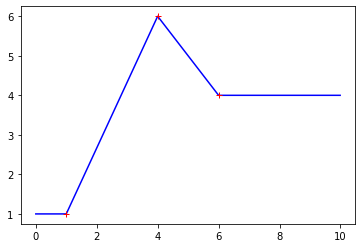

In [267]:
# TEST
grid = np.array([[1,4,6],[1,6,4]], dtype='float64')
grid.shape

x = np.arange(0,10,0.01)
y = linear_spline_3(x,grid)

plt.plot(x,y,'b')
plt.plot(grid[0,0],grid[1,0],'r+')
plt.plot(grid[0,1],grid[1,1],'r+')
plt.plot(grid[0,2],grid[1,2],'r+')

plt.show()

## Problem 2

Implement the quadratic spline function $f$ such that 
* $f(x_k)=y_k$ for $k=0,1,2$.
* $f$ is a quadratic function between the data points $x_{k}<x<x_{k+1}$ for $k=0,1$
* $f(x)=y_0$ for $x\le x_0$ and $f(x)=y_2$ for $x\ge x_2$ 
* $f$ is continuous. 
* $f$ is continuously differentiable at $x_1$.

Proceed as follows:

### (a) Derive formulas

We set

$f_1 (x) = c_1 + b_1 (x-x_0) + a_1 (x-x_0)^2$<br>
$f_2 (x) = c_2 + b_2 (x-x_1) + a_2 (x-x_1)^2$

Define:
$f(x)=\left\{\begin{array}{ll}
y_0 & (x < x_0)\\
f_1(x) & (x\in [x_0,x_1[)\\
f_2(x) & (x\in [x_1,x_2[)\\
y_2 & (x \ge x_2)\end{array}\right.$

Express the coefficients $a_1,b_1,c_1,a_2,b_2,c_2$ based on the coordinates of the datapoints under the condition that the resulting function is continuous and continuously differentiable for $x\in]x_0,x_2[$.

You will see that there is a remaining parameter that is not yet settled. We will fix by claiming that the derivative at $x_0$ is given by $\beta$.  

#### Your Solution HERE 

Use $x_0$ as input: $f_1(1) = c_1 + b_1(1-1) + a_1(1-1) = 1$ <br>
Simplify: $ f_1(1) = c_1 = 1$

<br>

Use $x_1$ as input: $f_1(4) = c_1 + b_1(4-1) + a_1(4-1)^2 $ <br>
Simplify: $f_1(4) = 1 + 3b_1 + 9a_1$ <br>

<br>

Use $x_1$ as input: $f_2(4) = c_1 + b_1(4-4) + a_1(4-4) = 6$ <br>
Simplify: $ f_2(4) = c_2 = 6$

<br>

Use $x_2$ as input: $f_2(6) = c_1 + b_1(6-4) + a_1(6-4)^2 = 4 $ <br>
Simplify: $f_1(6) = 6 + 2b_2 + 4a_2$ <br>

<br>

$f_1$ and $f_2$ intersect at $(x_1, y_1)$: 

* $f_1(x_1) = f_2(x_1)$
* $f_1'(x_1) = f_2'(x_1)$


We now have three equations for each segment and can solve for the coefficients. Which yields: 

$a_0 = 0.55555556$ <br>
$b_0 = -1.1111111$ <br>
$c_0 = 1.55555556$ <br>
$a_1 = -2.1666667$ <br>
$b_1 = 20.6666667$ <br>
$c_1 = -42$ <br>

### (b) Implement the function

Implement the function with signature as given below ($linear\_spline\_3$):


In [4]:
def quadratic_spline_3(x, grid, beta=0):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,3)
    beta - derivative at $x_0$, i.e. $f'(x_0)=beta$.
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    ## START YOUR CODE #
    
    # Equation of Spline 1 at Point 0
    # a*x0**2 + b*x0 + c = y0
    # a + b + c = 1
    x0 = grid[0, 0]
    y0 = grid[1, 0]
    eq0 = np.array([x0**2, x0, 1])
    
    # Equation of Spline 1 and 2 at Point 1
    # a*x0**2 + b*x0 + c= y0
    # 16a + 4b + c = 6   
    x1 = grid[0, 1]
    y1 = grid[1, 1]
    eq1 = np.array([x1**2, x1, 1])

    # Equation Of Spline 2 at Point 2
    # a*x2**2 + b*x2 + c = y2
    # 36a + 6b + c = 4
    x2 = grid[0, 2]
    y2 = grid[1, 2]
    eq2 = np.array([x2**2, x2, 1])
    
    # Ableitung an x_0 is given through beta
    # 2*a*x0 + b = beta
    # 2*a*1 + b = beta
    # 2*a + b = beta
    eqPrime0 = np.array([2*x0, 1, 0])
    yPrime0 = beta
    
    # Calculate First Segment function: 
    # Solve for a, b and c to get quadratic function of segment 1
    a0 = np.array([eq0, eq1, eqPrime0])
    b0 = np.array([y0, y1, yPrime0])
    s0 = np.linalg.solve(a0, b0)
    
    
    # Calculate Second Segment Function: 
    
    # Calculate Ableitung an x_1
    # 2*a+x1 + b = y
    # 2*s0[0]*x1 + s[1]
    aPrime = 2*s0[0]
    eqPrime1 = np.array([2*x1, 1, 0])
    yPrime1 = aPrime*x1 + s0[1]
    
    # Function of segment 1 at x_1 has to equal function of segment 2 at x_1
    # Slope of x_1 has to be equal in function of segment 1 and segment 2
    # Solve for a, b and c to get quadratic function of segment 1
    a1 = np.array([eq1, eq2, eqPrime1])
    b1 = np.array([y1, y2, yPrime1])
    s1 = np.linalg.solve(a1, b1)
    
    
    r = np.zeros([len(x)])    
    i = 0
    
    print("0:", s0)
    
    print("1:", s1)

    
    # Before first segment: Use Y fixed at Y value of point 0 
    while (x[i] < grid[0, 0]):
        r[i] = grid[0, 0]
        i = i+1
    

    # In Segemt 1 use Function of segment 1
    while (x[i] < grid[0, 1]):
        r[i] = quadratic(s0[0], s0[1], s0[2], x[i])
        i = i+1
        
        
    # In Segment 2 use Function of segment 2
    while (x[i] < grid [0, 2]):
        r[i] = quadratic(s1[0], s1[1], s1[2], x[i])
        i = i+1
        
    
    # Before first segment: Use Y fixed at Y value of point 2
    while (i < len(x)):
        r[i] = grid[0, 1]
        i = i+1
    
    
    return r
    ## END YOUR CODE ##
    

def quadratic(a, b, c, x):
    return a*(x**2) + b*x + c
    

#### TEST

0: [ 0.55555556 -1.11111111  1.55555556]
1: [ -2.16666667  20.66666667 -42.        ]


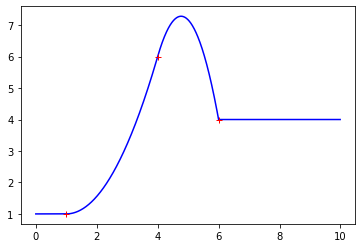

In [5]:
grid = np.array([[1,4,6],[1,6,4]], dtype='float64')

x = np.arange(0,10,0.01)
y = quadratic_spline_3(x,grid, beta=0)

plt.plot(x,y,'b')
plt.plot(grid[0,0],grid[1,0],'r+')
plt.plot(grid[0,1],grid[1,1],'r+')
plt.plot(grid[0,2],grid[1,2],'r+')

plt.show()

## Problem 3

Generalize the _quadratic spline_ function to an arbitrary number $m$ of grid points.

Assume that the x-values in the grid are sorted.

In [4]:
def quadratic_spline(x, grid, beta=0):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,m)
    beta - derivative at $x_0$, i.e. $f'(x_0)=beta$.
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    ## START YOUR CODE ##

    r = np.zeros([len(x)])    
    i = 0
    j = 0
    
    while (x[i] < grid[0, 0]):
        r[i] = grid[0, 0]
        i = i+1
    
    yPrime = beta
    while (x[i] < grid[0, -1]):
        
        # Equation Of Current Spline
        x0 = grid[0, j]
        y0 = grid[1, j]
        eq0 = np.array([x0**2, x0, 1])
        
        # Equation Of Next Spline
        x1 = grid[0, j+1]
        y1 = grid[1, j+1]
        eq1 = np.array([x1**2, x1, 1])
        
        # Derivative Equation
        # 2*a + b = beta
        # 2*a*x1 + b
        xPrime = 2*x0
        eqPrime = np.array([xPrime, 1, 0])
        
        
        a = np.array([eq0, eq1, eqPrime])
        b = np.array([y0, y1, yPrime])
        s = np.linalg.solve(a, b)
        
        
        while (x[i] < grid[0, j+1] and i < len(x)):
            r[i] = quadratic(s[0], s[1], s[2], x[i])
            i = i+1    
        
        j = j+1
        yPrime = 2*s[0]*x1 + s[1]
        
    while (i < len(x)):
        r[i] = grid[1, -1]
        i = i+1
    
    
    return r
    ## END YOUR CODE ##
    

def quadratic(a, b, c, x):
    return a*(x**2) + b*x + c


[0.000e+00 1.000e-02 2.000e-02 ... 1.497e+01 1.498e+01 1.499e+01]


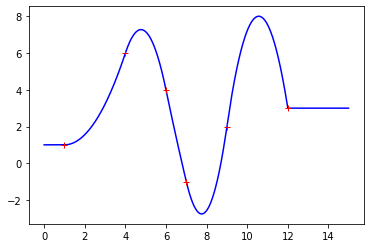

In [7]:
grid = np.array([[1,4,6,7,9,12],[1,6,4,-1,2,3]], dtype='float64')

x = np.arange(0,15,0.01)
y = quadratic_spline(x,grid, beta=0)

plt.plot(x,y,'b')
for i in range(grid.shape[1]):
    plt.plot(grid[0,i],grid[1,i],'r+')

plt.show()